# 1 Analyse Statistique

# 2 Nettoyer jeu de données

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv('data_2/personnes.csv')
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [3]:
data.isnull().sum()

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64

In [4]:
data.loc[data['email'].duplicated(keep=False)]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [5]:
countries = ['France', 'Bénin', 'Côte d\'ivoire', 'Madagascar']

In [6]:
mask = ~data['pays'].isin(countries)

In [7]:
data.loc[mask, 'pays'] = np.NaN

In [8]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [9]:
data['email'] = data['email'].str.split(',', n=1, expand=True)[0]
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,marco23@example.com,10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [10]:
data['taille'] = data['taille'].str[:-1]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,NaN
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [11]:
data.loc[data['taille'].isnull(), 'taille'] = data['taille'].mean()

In [12]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.490000
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.670000
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,1.841667
3,Marc,marco23@example.com,10/02/1978,France,1.650000
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.340000
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.450000
6,samuël,samuel_329@example.com,NaN,Bénin,1.450000


In [13]:
data['date_naissance'] = pd.to_datetime(data['date_naissance'], 
                                           format='%d/%m/%Y', errors='coerce')

In [14]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,1.490000
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.670000
2,Radia,choupipoune@supermail.eu,NaT,Côte d'ivoire,1.841667
3,Marc,marco23@example.com,1978-02-10,France,1.650000
4,Heri,helloworld@supermail.eu,2008-03-05,Madagascar,1.340000
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,3.450000
6,samuël,samuel_329@example.com,NaT,Bénin,1.450000


In [15]:
quiz = pd.read_csv('data_2/course+-+Quiz+P2.csv') 

In [16]:
quiz.iloc[245:255, :]

,Position,Sexe,Temps,Dept,Temps_secondes,Age
245,246,M,00:54:26,76,780866,55.0
246,247,F,00:54:27,76,780867,50.0
247,248,F,00:54:40,27,780880,35.0
248,249,M,00:54:44,27,780884,50.0
249,250,F,00:54:45,14,780885,23.0
250,251,M,54min47s,27,780887,42.0
251,252,M,00:54:49,14,780889,63.0
252,253,M,00:54:56,27,780896,35.0
253,254,F,00:54:56,27,780896,40.0
254,255,M,00:55:06,27,780906,38.0


In [17]:
quiz.head()

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,779543,40.0
1,2,M,00:32:40,27,779560,34.0
2,3,M,00:33:15,76,779595,44.0
3,4,M,00:33:23,76,779603,46.0
4,5,M,00:33:29,76,779609,26.0


In [18]:
departements = [76, 27, 14]

In [19]:
mask = ~quiz['Dept'].isin(departements)

In [20]:
quiz.loc[mask, 'Dept']

21     78
35     78
74     78
255    78
289    78
Name: Dept, dtype: int64

In [21]:
for col in quiz:
    print(quiz.loc[quiz[col].isna()])

Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age]
Index: []
     Position Sexe     Temps  Dept  Temps_secondes   Age
109       110  NaN  00:44:39    27          780279  53.0
291       292  NaN  00:59:16    27          781156  66.0
Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age]
Index: []
Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age]
Index: []
Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age]
Index: []
     Position Sexe     Temps  Dept  Temps_secondes  Age
73         74    M  00:42:05    14          780125  NaN
133       134    M  00:45:46    76          780346  NaN
190       191    M  00:49:52    27          780592  NaN
231       232    M  00:53:11    76          780791  NaN


In [22]:
quiz['Temps'] = pd.to_datetime(quiz['Temps'], errors='coerce')

In [23]:
quiz.loc[quiz['Temps'].isnull()]

,Position,Sexe,Temps,Dept,Temps_secondes,Age
250,251,M,NaT,27,780887,42.0


In [24]:
quiz.iloc[245:255, :]

,Position,Sexe,Temps,Dept,Temps_secondes,Age
245,246,M,2023-06-02 00:54:26,76,780866,55.0
246,247,F,2023-06-02 00:54:27,76,780867,50.0
247,248,F,2023-06-02 00:54:40,27,780880,35.0
248,249,M,2023-06-02 00:54:44,27,780884,50.0
249,250,F,2023-06-02 00:54:45,14,780885,23.0
250,251,M,NaT,27,780887,42.0
251,252,M,2023-06-02 00:54:49,14,780889,63.0
252,253,M,2023-06-02 00:54:56,27,780896,35.0
253,254,F,2023-06-02 00:54:56,27,780896,40.0
254,255,M,2023-06-02 00:55:06,27,780906,38.0


In [25]:
quiz['Age'].sort_values(ascending = False)

302    174.0
260     73.0
120     72.0
218     72.0
140     71.0
       ...  
139     18.0
73       NaN
133      NaN
190      NaN
231      NaN
Name: Age, Length: 340, dtype: float64

In [26]:
quiz['Position'].sort_values(ascending = False)

264    2640
339     340
338     339
337     338
336     337
       ... 
3         4
2         3
1         2
0         1
43     -100
Name: Position, Length: 340, dtype: int64

In [27]:
quiz.loc[quiz['Position'].duplicated(keep=False)]

,Position,Sexe,Temps,Dept,Temps_secondes,Age


In [28]:
quiz['Temps_secondes'].notnull().sum()

340

In [29]:
quiz['Sexe'].sort_values()

339      F
253      F
256      F
257      F
91       F
      ... 
122      M
93       O
167      O
109    NaN
291    NaN
Name: Sexe, Length: 340, dtype: object

In [30]:
quiz['Dept'].value_counts(normalize=True)

76    0.614706
27    0.302941
14    0.067647
78    0.014706
Name: Dept, dtype: float64

# 3 Représentations variables

In [31]:
operations = pd.read_csv('data_2/operations.csv')

In [32]:
operations['montant'].mode()

0   -1.6
dtype: float64

In [33]:
operations['montant'].mean()

-45.91188925081436

In [34]:
operations['montant'].median()

-9.6

In [35]:
for categories in operations['categ'].unique():
    
    print(categories, ':', '\nMoyenne : ', operations.loc[operations['categ']== categories, 'montant'].mean(), 
         '\nMediane : ',operations.loc[operations['categ']== categories, 'montant'].median(), 
         '\nMode : ',operations.loc[operations['categ']== categories, 'montant'].mode())

AUTRE : 
Moyenne :  -47.42071090047394 
Mediane :  -8.14 
Mode :  0   -1.6
dtype: float64
TRANSPORT : 
Moyenne :  -52.99714285714286 
Mediane :  -53.1 
Mode :  0   -73.0
dtype: float64
FACTURE TELEPHONE : 
Moyenne :  -7.973333333333333 
Mediane :  -7.02 
Mode :  0   -7.02
1   -6.38
dtype: float64
COURSES : 
Moyenne :  -16.497435897435896 
Mediane :  -12.24 
Mode :  0   -32.67
dtype: float64
COTISATION BANCAIRE : 
Moyenne :  -1.8857142857142857 
Mediane :  -1.92 
Mode :  0   -1.92
dtype: float64
RESTAURANT : 
Moyenne :  -10.332500000000001 
Mediane :  -10.1 
Mode :  0   -9.2
dtype: float64
LOYER : 
Moyenne :  -345.0 
Mediane :  -345.0 
Mode :  0   -345.0
dtype: float64
nan : 
Moyenne :  nan 
Mediane :  nan 
Mode :  Series([], dtype: float64)


In [36]:
operations['categ'].unique()

array(['AUTRE', 'TRANSPORT', 'FACTURE TELEPHONE', 'COURSES',
       'COTISATION BANCAIRE', 'RESTAURANT', 'LOYER', nan], dtype=object)

# 3 Analyse Bivariée

In [37]:
operations

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


In [38]:
X = "categ" #qualitative
Y = "montant" #quantitative

In [42]:
depenses = operations[operations['montant']<0].copy()

depenses['montant'] = -depenses['montant']

depenses = depenses[depenses['categ'] != 'LOYER']

depenses

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,73.00,1489.81,TRANSPORT
5,2023-04-03,CARTE XX XX XX XX,14.39,2097.61,AUTRE
6,2023-04-05,CARTE XX XX XX XX XX,15.20,2083.22,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,10.00,2423.58,RESTAURANT


In [43]:
modalites = depenses[X].unique()

groupes = []

for m in modalites :
    groupes.append(depenses[depenses[X] == m][Y])

In [44]:
groupes

[0       1.44
 5      14.39
 6      15.20
 7      12.00
 12     24.00
        ...  
 299     1.20
 300     1.76
 301    36.00
 304    10.64
 305     4.80
 Name: montant, Length: 194, dtype: float64,
 1       24.00
 2       73.00
 20       2.70
 36       1.70
 56      73.00
 83     138.24
 95      73.00
 120     29.00
 141     23.85
 149     73.00
 152     73.00
 159     53.10
 160      1.53
 162      1.08
 170    190.80
 196     75.20
 241      5.00
 254     75.20
 272     11.25
 275     47.61
 303     67.68
 Name: montant, dtype: float64,
 8       7.02
 62      7.02
 102     6.38
 204     7.46
 260     6.38
 308    13.58
 Name: montant, dtype: float64,
 9       6.80
 19     42.42
 43     32.67
 44     32.67
 46      1.90
 47      9.11
 50     12.24
 58     17.16
 60      3.48
 68     42.45
 72     33.55
 74     12.96
 85      4.41
 90     22.59
 92      6.89
 103     2.51
 104     4.63
 105     5.88
 114     4.39
 118    18.45
 119     9.31
 129     6.60
 130    27.68
 139    12.49
 1

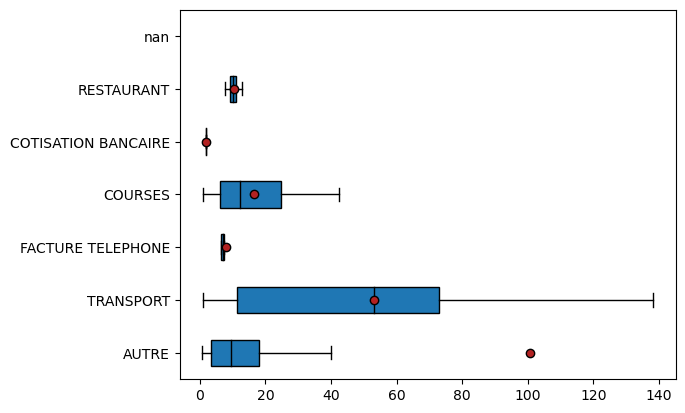

In [51]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [52]:
courses_2 = pd.read_csv('data_2/quiz/course+-+Quiz+P4+(1).csv')

In [53]:
courses_2

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,1643543,40
1,2,M,00:32:40,27,1643560,34
2,3,M,00:33:15,76,1643595,44
3,4,M,00:33:23,76,1643603,46
4,5,M,00:33:29,76,1643609,26
...,...,...,...,...,...,...
335,336,F,01:08:34,27,1645714,41
336,337,F,01:08:36,27,1645716,48
337,338,M,01:09:31,27,1645771,24
338,339,F,01:09:31,27,1645771,25
